In [1]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import numpy as np
import json
import os
import datetime
import pytz
import matplotlib.pyplot as plt
from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

In [3]:
graph_files = os.listdir()
graph_files = [g for g in graph_files if g.endswith('.graphml') & g.startswith('2015-')]

In [4]:
graph_files

['2015-08-21T03:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T20:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T09:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T05:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T23:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T16:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T19:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T07:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T08:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T21:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T00:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T22:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T17:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T12:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T04:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graph

# Network Analysis - Example: One Network
* Confidence 0.99, 160px radius, 6 frames as intractionlength.
* Day-Networks 21.08.2015

In [6]:
G = nx.read_graphml("2015-08-21T00:00:00Z_1d_allCams_0.99conf_160dist_6ilen.graphml")

## Global Properties

### Nodes, Edges, average Degree and Density

In [7]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1155\nNumber of edges: 160460\nAverage degree: 277.8528'

In [8]:
len(G.nodes())

1155

In [9]:
len(G.edges())

160460

In [10]:
Series(G.degree()).mean()

277.85281385281388

In [11]:
density = nx.density(G)
density

0.24077366884992535

### Degree distribution

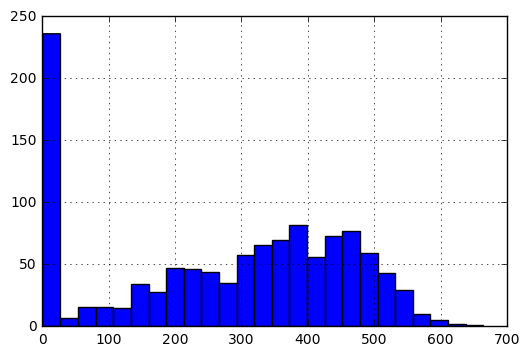

In [12]:
degrees = G.degree().values()
s = Series(list(degrees))
s.hist(bins=25)

In [13]:
s.describe()

count    1155.000000
mean      277.852814
std       180.142311
min         1.000000
25%       129.000000
50%       317.000000
75%       428.000000
max       664.000000
dtype: float64

### Edge weights distribution

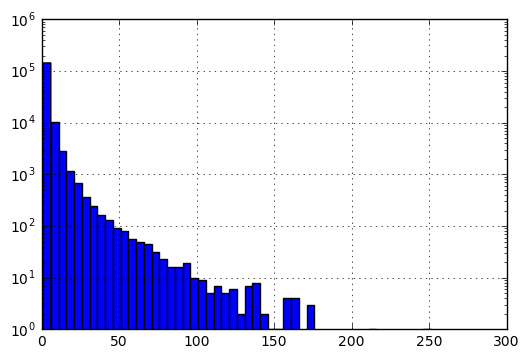

In [14]:
l = []

for e in G.edges():
    l.append(G.get_edge_data(e[0],e[1]).get("weight"))

edge_weights = Series(l)

fig, ax = plt.subplots()
ax.set_yscale('log')
edge_weights.hist(bins=50)

In [15]:
edge_weights.describe()

count    160460.000000
mean          2.940720
std           5.628725
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         251.000000
dtype: float64

### Weighted Degree Distribution

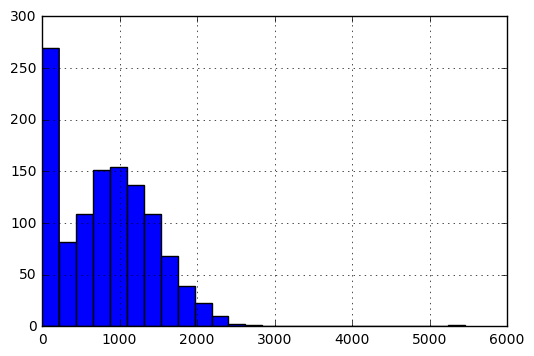

In [16]:
degrees = G.degree(weight='weight').values()
s = Series(list(degrees))
s.hist(bins=25)

### Number of components and size distribution

In [17]:
Gcc = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print("Number of components: {}".format(len(Gcc)))

size_components = []
for comp in Gcc:
    size_components.append(nx.number_of_nodes(comp))
    
Counter(list(size_components))

Number of components: 1


Counter({1155: 1})

There is one big component!

### Diameter

In [18]:
diameter = nx.diameter(G)
print("Diameter: {}".format(diameter))

Diameter: 4


### Global clustering coefficient

In [19]:
cc = nx.average_clustering(G)
cc

0.48438434009970527

### Average shortest path length

In [20]:
average_shortest_path = nx.average_shortest_path_length(G)

In [21]:
print("Average shortest path: {}".format(average_shortest_path))

Average shortest path: 1.9686526067808563


## Compare to Random Graph Model
* degree distribution (not biniminal/poisson) - ja sieht nicht binominalverteilt aus, sieht ziemlich nach scale free, wenige hubs, viele knote mit wenig links
* connectedness (giant component) - ja sieht ziemlich verbunden aus alles, gibt nur eine große komponente
* average path length (~diameter) - ist hier auch ziemlich klein, Small-world phenomenon, $d = \frac{\ln nodes}{\ln av degree}$
* clustering coefficient - müsste höher sein als bei einem random network, jep ist es auch

In [22]:
random_g = nx.erdos_renyi_graph(n=nx.number_of_nodes(G), p=density)
nx.info(random_g)

'Name: gnp_random_graph(1155,0.24077366884992535)\nType: Graph\nNumber of nodes: 1155\nNumber of edges: 160552\nAverage degree: 278.0121'

In [23]:
nx.average_clustering(random_g)

0.24068804376048006

In [24]:
nx.average_clustering(G)

0.48438434009970527

## Local Structure (node level metrics)

### Betweennes Centrality

In [25]:
bc = nx.betweenness.betweenness_centrality(G)

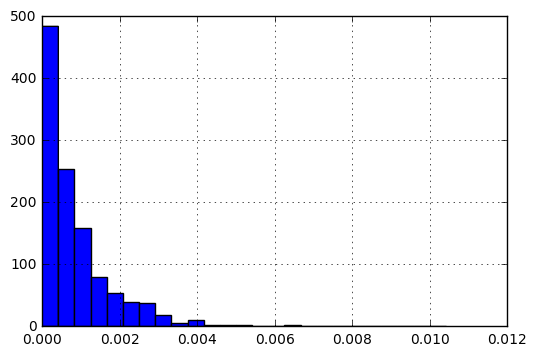

In [26]:
Series(bc).hist(bins = 25)

### Degree Centrality

In [27]:
dc = nx.degree_centrality(G)

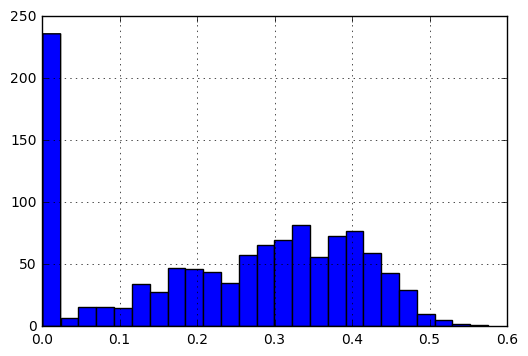

In [28]:
Series(dc).hist(bins = 25)

### Closeness Centrality

In [29]:
closenessc = nx.closeness.closeness_centrality(G)

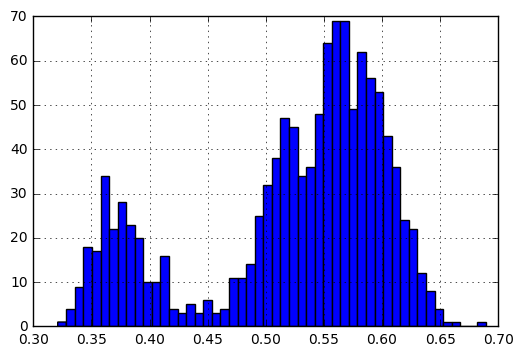

In [30]:
Series(closenessc).hist(bins=50)

### Eigenvector Centrality

In [31]:
# Kernel will die!
# ec = nx.eigenvector_centrality_numpy(G)